Perform all  preprocessing tasks on any other text dataset.
Here I have taken movie review dataset.

In [1]:
import nltk                                
from nltk.corpus import movie_reviews as mr
import matplotlib.pyplot as plt            
import random    
import os
from collections import defaultdict

Here I have taken only 10 positive & 10 negative reviews.

In [2]:
reviews = nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [3]:
documents = defaultdict(list)

for i in mr.fileids():
    documents[i.split('/')[0]].append(i)

print (documents['pos'][:10]) 
pos_review = documents['pos'][:10]
print (documents['neg'][:10])
neg_review = documents['neg'][:10]

['pos/cv000_29590.txt', 'pos/cv001_18431.txt', 'pos/cv002_15918.txt', 'pos/cv003_11664.txt', 'pos/cv004_11636.txt', 'pos/cv005_29443.txt', 'pos/cv006_15448.txt', 'pos/cv007_4968.txt', 'pos/cv008_29435.txt', 'pos/cv009_29592.txt']
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']


Matplotlib's pyplot library

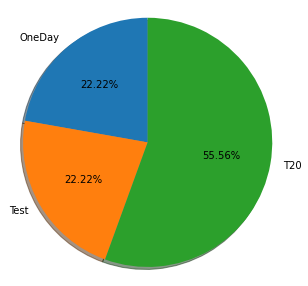

In [4]:
fig = plt.figure(figsize=(5, 5))

labels = 'OneDay', 'Test','T20'

sizes = [20, 20, 50] 

plt.pie(sizes, labels=labels, autopct='%.2f%%',shadow=True, startangle=90)
plt.axis('equal')  
plt.show()

In [5]:
print('Number of positive Reviews: ', len(pos_review))
print('Number of negative Reviews: ', len(neg_review))

print('\nThe type of all_positive_Reviews is: ', type(pos_review))
print('The type of a Review entry is: ', type(neg_review[0]))

Number of positive Reviews:  10
Number of negative Reviews:  10

The type of all_positive_Reviews is:  <class 'list'>
The type of a Review entry is:  <class 'str'>


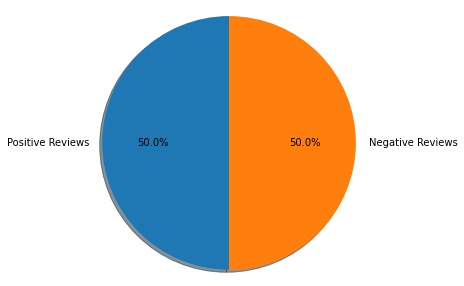

In [ ]:
fig = plt.figure(figsize=(5, 5))

labels = 'Positive Reviews', 'Negative Reviews'

sizes = [len(pos_review), len(neg_review)]  

plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.axis('equal')  

plt.show()

Preprocess raw text for Sentiment analysis

In [6]:
abc = mr.words(pos_review[random.randint(0,10)])
print("Positive review")
print(abc)
abd= mr.words(neg_review[random.randint(0,10)])
print("Negative review")
print(abd)

Positive review
['"', 'jaws', '"', 'is', 'a', 'rare', 'film', 'that', ...]
Negative review
['call', 'it', 'a', 'road', 'trip', 'for', 'the', ...]


In [7]:
print(pos_review)

['pos/cv000_29590.txt', 'pos/cv001_18431.txt', 'pos/cv002_15918.txt', 'pos/cv003_11664.txt', 'pos/cv004_11636.txt', 'pos/cv005_29443.txt', 'pos/cv006_15448.txt', 'pos/cv007_4968.txt', 'pos/cv008_29435.txt', 'pos/cv009_29592.txt']


In [8]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer 

Remove stop words and punctuations

In [10]:
stopwords_english = stopwords.words('english')
print (stopwords_english)


all_words = [word.lower() for word in mr.words()]
 
# print first 10 words
print (all_words[:10])
all_words_without_stopwords = [word for word in all_words if word not in stopwords_english]
print (all_words_without_stopwords[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
import string
 
print (string.punctuation)
all_words_without_punctuation = [word for word in all_words if word not in string.punctuation]
print (all_words_without_punctuation[:10])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
['plot', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', 'drink']


Stemming

In [12]:
print()
print('\033[92m')
print(all_words_without_punctuation[:10])
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
review_stem = [] 

for word in all_words_without_punctuation[:10]:
    stem_word = stemmer.stem(word)  
    review_stem.append(stem_word)  

print('stemmed words:')
print(review_stem)



['plot', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', 'drink']

stemmed words:
['plot', 'two', 'teen', 'coupl', 'go', 'to', 'a', 'church', 'parti', 'drink']
